<a href="https://colab.research.google.com/github/aminoplis/HealthReports/blob/master/Performance_on_Covid_19_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualizing COVID-19 data to see Performance Strategy by Country**

Carlos J/C (Apr-2020)


Using Matplotlib, we’ll explore COVID-19 data to see the evolution of the results of the strategies followed by selected countries.

### The Data Used
We’ll be using data from the Github repository that auto-updates the data daily. We’ll load our data into a Pandas’ dataframe based on the URL so that it’ll update automatically for us every day.

Ref: https://raw.githubusercontent.com/datasets/covid-19/master/data/

In [1]:
#@title
# Section 1 - Loading our Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline 

# Section 2 - Loading and Selecting Data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', 
                 parse_dates=['Date'])
countries = ['Germany', 'Argentina', 'Italy', 'Spain', 'US', 'Chile', 'China', 'United Kingdom']
df = df[df['Country'].isin(countries)]

# Section 3 - Creating Columns to be show
#df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df['Cases'] = df['Confirmed']
df['Actives'] = df['Confirmed']-df['Recovered']-df['Deaths']
df['Mortality'] = df['Deaths']/df['Cases']*100
df['Contained'] = df['Recovered']/df['Cases']*100
df.describe()

,Confirmed,Recovered,Deaths,Cases,Actives,Mortality,Contained
count,744.000000,744.000000,744.000000,744.000000,744.000000,629.000000,629.000000
mean,46780.711022,12180.811828,2892.373656,46780.711022,31707.525538,3.271289,21.414571
std,108072.305640,24468.167181,6719.224978,108072.305640,90706.459766,3.757849,28.932400
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.793788
50%,1130.500000,30.000000,17.000000,1130.500000,1017.500000,2.264858,8.433898
75%,74440.750000,5871.000000,2721.750000,74440.750000,25837.000000,4.472968,27.473671
max,869170.000000,103300.000000,49954.000000,869170.000000,739013.000000,13.494822,100.000000


###Preparing our Dataframes for Data Visualization
Now that we have our data stored within a dataframe, let’s prepare two further dataframes that will hold our data in crosstabs, which will allow us to more easily visualize the data.
* For percapita values, we use the population and multiply it by 100,000 to generate a number of cases per 100,000 people. https://www.worldometers.info/world-population/population-by-country/

In [2]:
#@title
# Section 4 - Restructuring our Data
dfp = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(dfp.columns)
covid = dfp.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries
fechaactual=covid[len(covid)-1:].index[0].strftime("%Y-%m-%d")

dfm = df.pivot(index='Date', columns='Country', values='Mortality')
covidm = dfm.reset_index('Date')
covidm.set_index(['Date'], inplace=True)
covidm.columns = countries
#for country in list(covidm.columns):
#    covidm[country] = covidm[country]/covid[country]*100

dfm = df.pivot(index='Date', columns='Country', values='Contained')
covidc = dfm.reset_index('Date')
covidc.set_index(['Date'], inplace=True)
covidc.columns = countries

# Section 5 - Calculating Rates per 100,000
populations = {'Argentina':45195774, 'Germany': 83783942, 'Italy': 60461826, 'Spain': 46754778, 
               'US': 331002651, 'Chile': 19116201, 'China':1439323776, 'United Kingdom': 67886011}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000
    
#covidm.head(-1)
print('Recovered Factor(Contained)')
covidc[len(covid)-5:].head()

Recovered Factor(Contained)


,Argentina,Chile,China,Germany,Italy,Spain,US,United Kingdom
Date,,,,,,,,
2020-04-19,24.973582,43.001586,92.703299,60.612740,26.291822,38.936650,9.269395,0.359819
2020-04-20,25.059504,44.503664,92.755646,62.217387,26.969894,40.251236,9.221803,0.354373
2020-04-21,27.713626,45.873338,92.780223,64.198097,28.050033,40.412777,9.263116,0.490121
2020-04-22,27.735369,47.680595,92.837554,65.981626,29.116465,41.228184,9.206391,0.507286
2020-04-23,26.754003,49.136471,92.965285,67.459462,30.307465,41.896688,9.227539,0.511325


### Creating our First Visualization — Cases over Time
Let’s begin by creating our first visualization that will demonstrate the number of total cases over time in various countries.


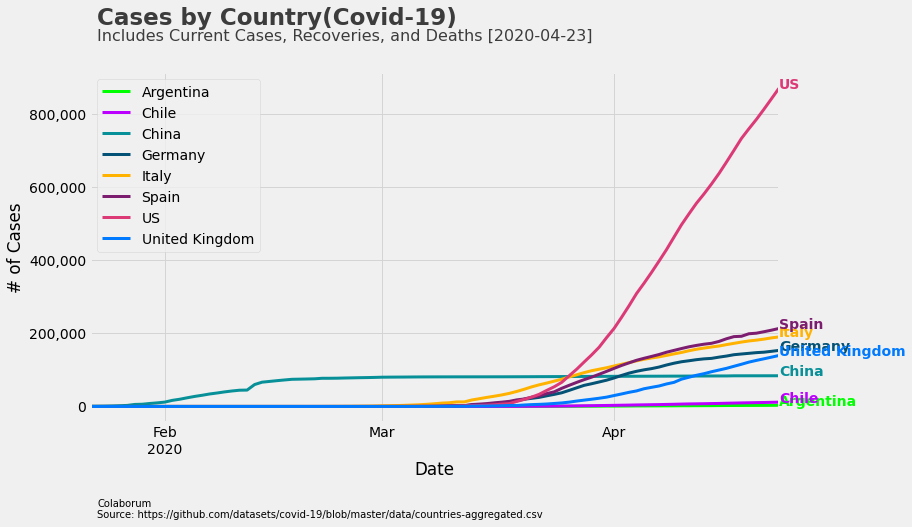

In [3]:
#@title
# Section 6 - Generating Colours and Style
colors = { 'Argentina':'#00FF00','Chile':'#BB00FF', 'China':'#089099', 'Germany':'#045275',
          'Italy':'#FFB200', 'Spain':'#7C1D6F', 'US':'#DC3977', 'United Kingdom':'#007aff' }
plt.style.use('fivethirtyeight')

# Section 7 - Creating the Visualization
plot = covid.plot(figsize=(11,6), color=list(colors.values()), linewidth=3, legend=True)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Section 8 - Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, 
              weight = 'bold')

# Section 9 - Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())*1.2, 
          s = "Cases by Country(Covid-19)", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())*1.15, 
          s = "Includes Current Cases, Recoveries, and Deaths ["+fechaactual+"]", fontsize = 16, alpha = .75)
plot.text(x = percapita.index[1], y = -int(covid.max().max())*.35,
          s = 'Colaborum\nSource: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', 
          fontsize = 10)
print('')

### Creating our Second Visualization — Cases per 100,000 People

This values indicates the extention of the desease in every country, considering it's own population.

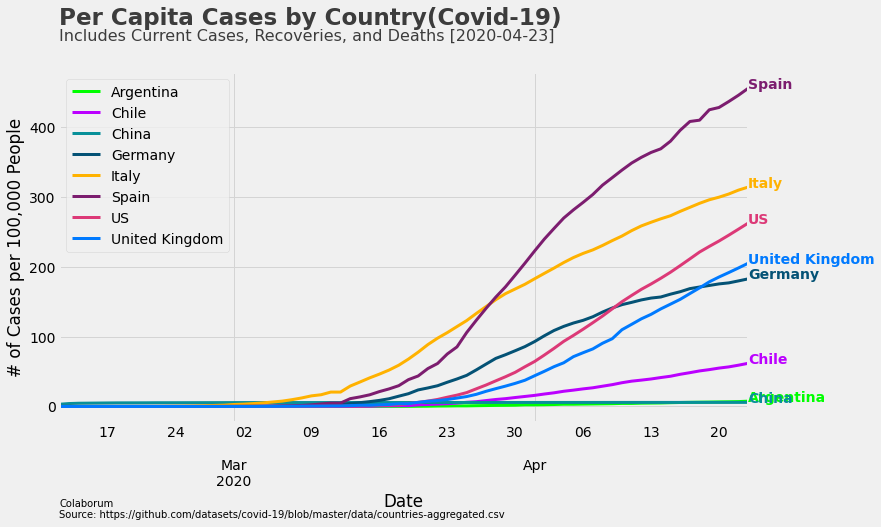

In [4]:
#@title
initdata=21
percapitaplot = percapita[+initdata:].plot(figsize=(11,6), color=list(colors.values()), linewidth=3, legend=True)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], 
                       s = country, weight = 'bold')
percapitaplot.text(x = percapita.index[+initdata], y = percapita.max().max()*1.2, 
                   s = "Per Capita Cases by Country(Covid-19)", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[+initdata], y = percapita.max().max()*1.15, 
                   s = "Includes Current Cases, Recoveries, and Deaths ["+fechaactual+"]", fontsize = 16, alpha = .75)
percapitaplot.text(x = percapita.index[+initdata], y = -percapita.max().max()*0.35,
        s = 'Colaborum\nSource: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', 
        fontsize = 10)
print('')

### Creating our Tirth Visualization — Mortality

Now showing the "Mortality rate" over the total confirmed cases, we can see the countries with the lowest situations of people death after been confirmed with the desease. Great work for countries under the 2%.

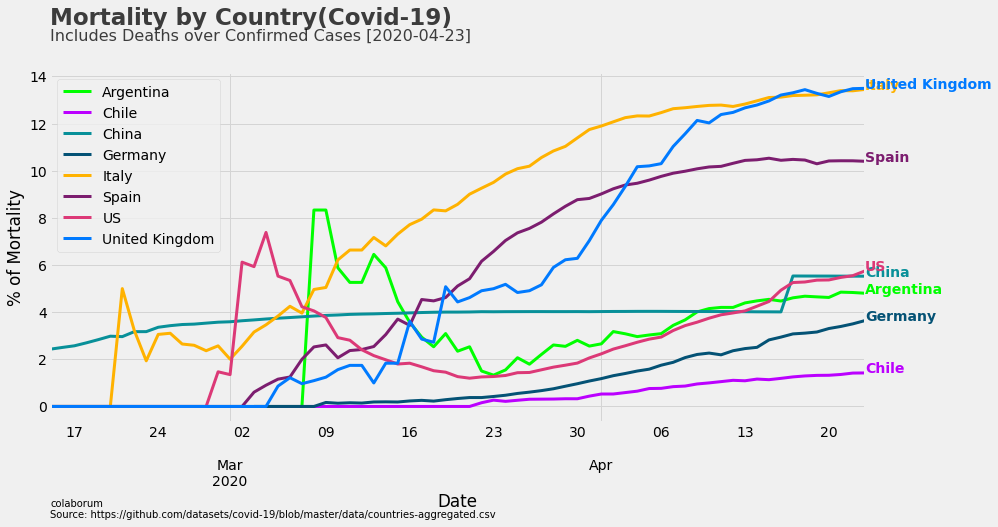

In [5]:
#@title
indexdata=24
covidmplot = covidm[+indexdata:].plot(figsize=(13,6), color=list(colors.values()), linewidth=3, legend=True)
covidmplot.grid(color='#d4d4d4')
covidmplot.set_xlabel('Date')
covidmplot.set_ylabel('% of Mortality')
for country in list(colors.keys()):
    covidmplot.text(x = covidm.index[-1], y = covidm[country][len(covidm)-1], color = colors[country], 
                       s = country, weight = 'bold')
covidmplot.text(x = covidm.index[+indexdata], y = covidm.max().max()*1.2, 
                   s = "Mortality by Country(Covid-19)", fontsize = 23, weight = 'bold', alpha = .75)
covidmplot.text(x = covidm.index[+indexdata], y = covidm.max().max()*1.15, 
                   s = "Includes Deaths over Confirmed Cases ["+fechaactual+"]", fontsize = 16, alpha = .75)
covidmplot.text(x = covidm.index[+indexdata], y = -covidm.max().max()*0.35,
        s = 'colaborum\nSource: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', 
        fontsize = 10)
print('')

### Creating our Fourth Visualization — Contained Rate

Now showing the "Contained rate" over the total confirmed cases, we can see how countries advance on the recovery of the people with the desease. Great work for countries over the 50% of advance.

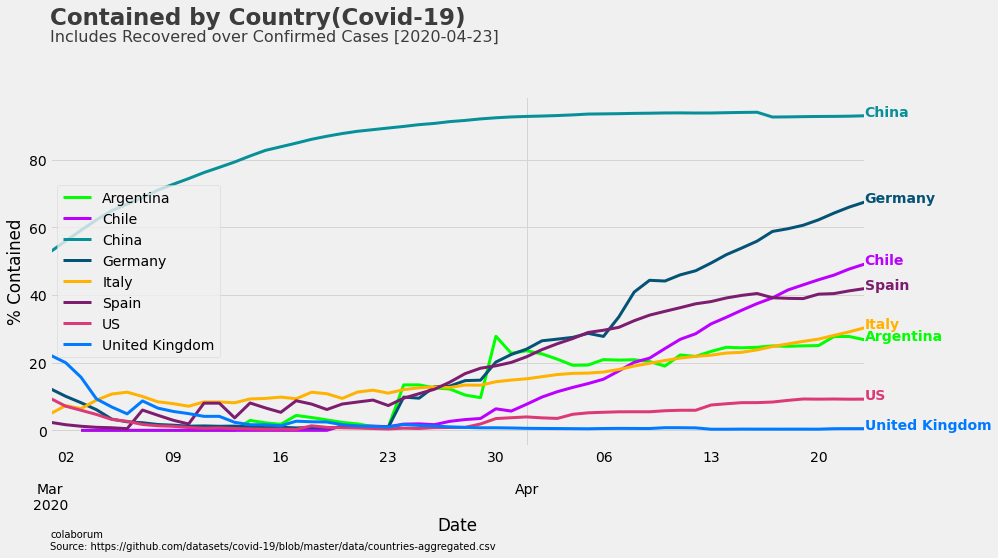

In [6]:
#@title
indexdata=39
covidcplot = covidc[+indexdata:].plot(figsize=(13,6), color=list(colors.values()), linewidth=3, legend=True)
covidcplot.grid(color='#d4d4d4')
covidcplot.set_xlabel('Date')
covidcplot.set_ylabel('% Contained')
for country in list(colors.keys()):
    covidcplot.text(x = covidc.index[-1], y = covidc[country][len(covidc)-1], color = colors[country], 
                       s = country, weight = 'bold')
covidcplot.text(x = covidc.index[+indexdata], y = covidc.max().max()*1.2, 
                   s = "Contained by Country(Covid-19)", fontsize = 23, weight = 'bold', alpha = .75)
covidcplot.text(x = covidc.index[+indexdata], y = covidc.max().max()*1.15, 
                   s = "Includes Recovered over Confirmed Cases ["+fechaactual+"]", fontsize = 16, alpha = .75)
covidcplot.text(x = covidc.index[+indexdata], y = -covidc.max().max()*0.35,
        s = 'colaborum\nSource: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', 
        fontsize = 10)
print('')

# **Conclusion**

Based on some visual data, we consider a consistence and a greath work on Germany and Chile advance, having a Low Mortality rate as they has and advance on more than 50% on recoveries (Contained rate).